## Group 38 - Assignment 2

### Abdullah Irfan, Tausif Ahmed, Zainab Ahmed

### Question 1

#### 1. Load a simple dataset and perform some basic data preprocessing to fill out "unknowns", outliers or other invalid data. Explain what preprocessing was performed and why. Also, change categorical data into numerical features using pandas.get_dummies()

In [1]:
import numpy as np
import pandas as pd

In [3]:
bank_df = pd.read_csv("~/bank-additional.csv",sep=";")
print(bank_df.shape)

(4119, 21)


In [4]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
bank_df.isnull().values.any()

False

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [7]:
bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [8]:
for col in bank_df.columns.values:
       # Using whole data to form an exhaustive list of levels
    if bank_df[col].dtypes=='object':
           print(bank_df[col].value_counts())    
   

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
no         3315
unknown     803
yes           1
Name: default, dtype: int64
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64
no         3349
yes         665
unknown     105
Name: loan, dtype: int64
cellular     2652
telephone    1467
Name: contact, dtype: int64
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
o

The above output shows that only 'job', 'marital', 'education', 'housing', 'loan', and 'default' columns have 'uknown' as values. We'll replace these values by the highest occuring values in each column 

In [9]:

bank_df['job'].replace('unknown','admin.',inplace = True)
bank_df['marital'].replace('unknown','married', inplace = True)
bank_df['education'].replace('unknown','university.degree', inplace = True)
bank_df['housing'].replace('unknown','yes', inplace = True)
bank_df['loan'].replace('unknown','no', inplace = True)
bank_df['default'].replace('unknown','no', inplace = True)

#print(bank_df['job'].value_counts())
#print(bank_df['marital'].value_counts())
#print(bank_df['education'].value_counts())
#print(bank_df['housing'].value_counts())
#print(bank_df['loan'].value_counts())


All 'unknown' values in categorical variables were handled. Now we'll consider all the numerical columns for cleansing. 

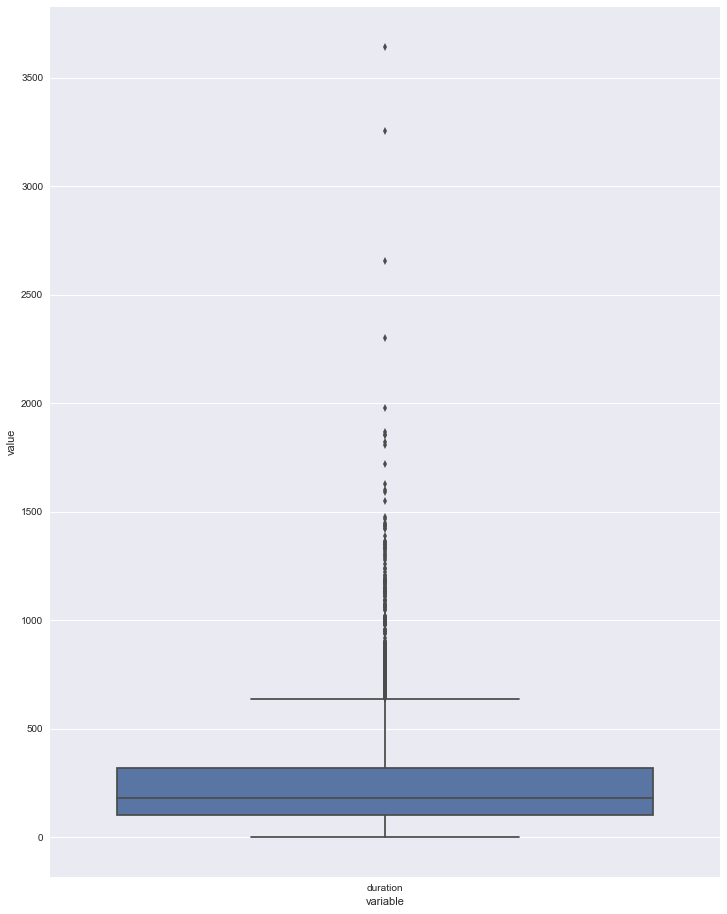

In [13]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,16)})
bank_subset = bank_df[['duration']]
plot.set(ylim=(0,3600))
plot = sns.boxplot(x="variable", y="value", data=pd.melt(bank_subset))


In [14]:
import statistics
#bank_df['duration'].value_counts().sort_index()
mean_dur = bank_df['duration'].mean()
std_dur = statistics.stdev(bank_df['duration'])
#print(std)

sum(bank_df['duration'] > (mean_dur+(3*std_dur)))
sum(bank_df['duration'] > 2000)

4

Since only 4 values are possible outliers, removing them from the dataset

[(0, 2100)]

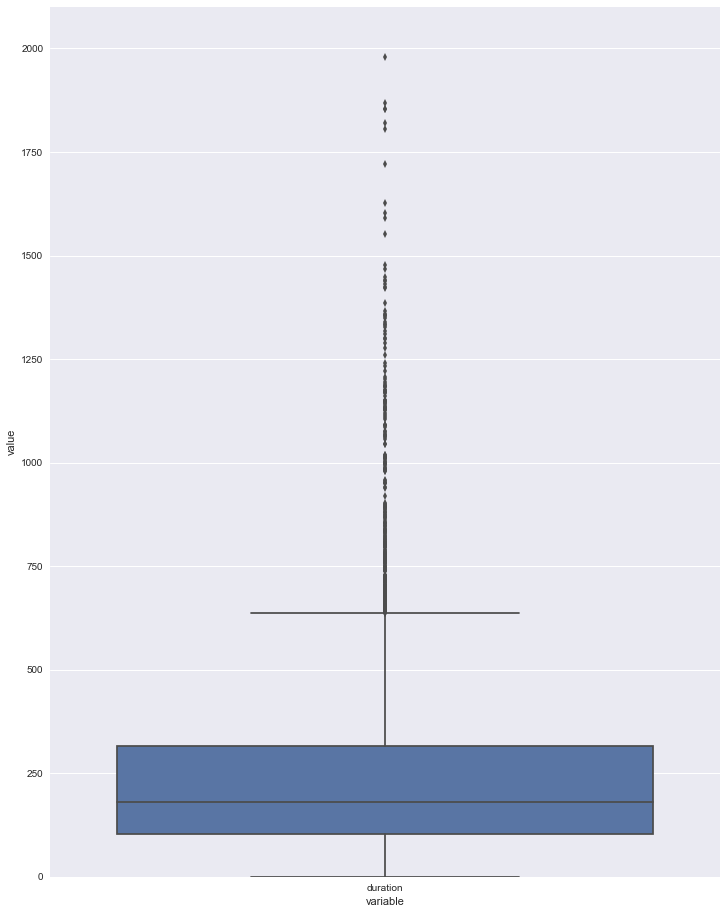

In [15]:
#bank_df['duration'] = np.where(bank_df['duration'] > (mean_dur+(3*std_dur)), mean_dur, bank_df['duration'])
bank_df =  bank_df[bank_df['duration'] < 2000]
bank_subset = bank_df[['duration']]
plot = sns.boxplot(x="variable", y="value", data=pd.melt(bank_subset))
plot.set(ylim=(0, 2100))

The 'duration' column has been fixed for outliers. We'll now scale all the variables using MinMaxScaler() and will later encode all the categorical variables using pandas.get_dummies()

In [16]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [17]:
#bank_df.columns.values

from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
# Scaling down data
bank_df[['age','duration','campaign','pdays','previous','emp.var.rate',
         'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=min_max.fit_transform(bank_df[['age','duration','campaign','pdays','previous','emp.var.rate',
         'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.171429,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0.029412,1.0,0.000000,nonexistent,0.333333,0.269680,0.192469,0.156401,0.512287,no
1,0.300000,services,single,high.school,no,no,no,telephone,may,fri,...,0.088235,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.973472,0.859735,no
2,0.100000,services,married,high.school,no,yes,no,telephone,jun,wed,...,0.000000,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.998155,1.000000,no
3,0.285714,services,married,basic.9y,no,yes,no,telephone,jun,fri,...,0.058824,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.997463,1.000000,no
4,0.414286,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0.000000,1.0,0.000000,nonexistent,0.687500,0.389322,0.368201,0.820300,0.877883,no
5,0.200000,services,single,university.degree,no,no,no,cellular,sep,thu,...,0.058824,1.0,0.333333,failure,0.479167,0.778644,0.556485,0.057439,0.000000,no
6,0.200000,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,0.088235,1.0,0.000000,nonexistent,0.479167,0.778644,0.556485,0.056286,0.000000,no
7,0.328571,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,0.029412,1.0,0.000000,nonexistent,0.687500,0.389322,0.368201,0.820300,0.877883,no
8,0.185714,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,0.000000,1.0,0.166667,failure,0.687500,0.389322,0.368201,0.811534,0.877883,no
9,0.242857,blue-collar,married,basic.9y,no,no,no,telephone,may,thu,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.973472,0.859735,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8A7280A20>,
      dtype=object)

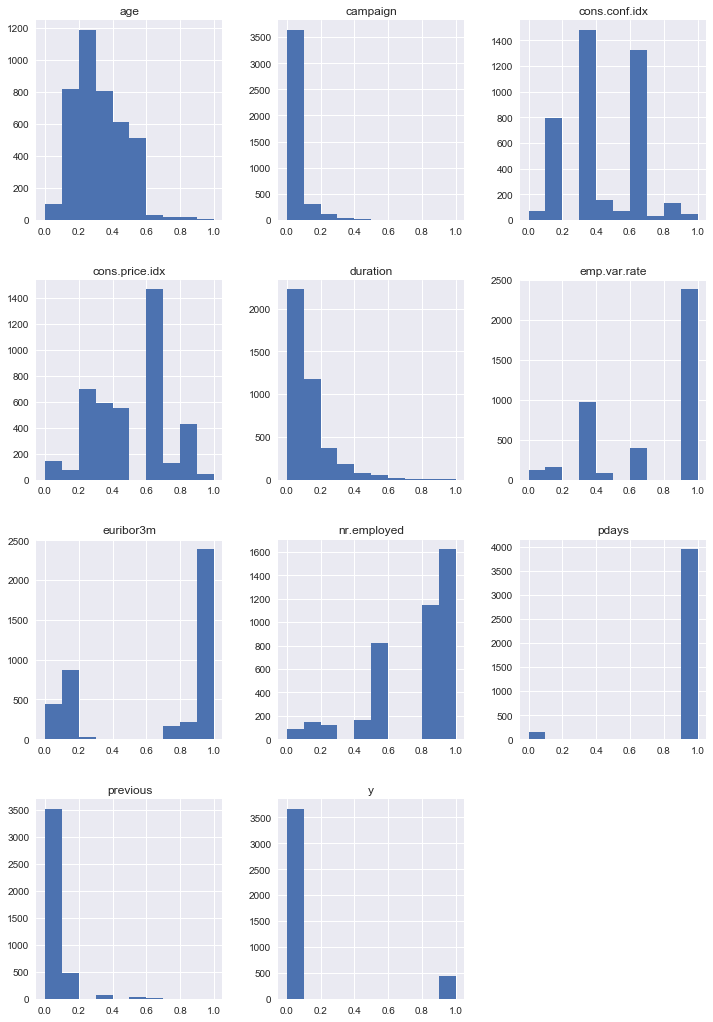

In [39]:
import matplotlib.pyplot as plt

bank_df[bank_df.dtypes[(bank_df.dtypes=="float64")|(bank_df.dtypes=="int64")]
                        .index.values].hist(figsize=[12,18])

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

bank_df['y']= le.fit_transform(bank_df['y'])

bank_df['y'].unique()

array([0, 1], dtype=int64)

In [20]:
bank_df = pd.get_dummies(bank_df, columns=['job','marital','education','default','housing','loan','contact',
                                 'month','day_of_week','poutcome'], drop_first=True)
bank_df.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.171429,0.245960,0.029412,1.0,0.000000,0.333333,0.269680,0.192469,0.156401,0.512287,...,1,0,0,0,0,0,0,0,1,0
1,0.300000,0.174747,0.088235,1.0,0.000000,0.937500,0.698753,0.602510,0.973472,0.859735,...,1,0,0,0,0,0,0,0,1,0
2,0.100000,0.114646,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.998155,1.000000,...,0,0,0,0,0,0,0,1,1,0
3,0.285714,0.008586,0.058824,1.0,0.000000,1.000000,0.882307,0.376569,0.997463,1.000000,...,0,0,0,0,0,0,0,0,1,0
4,0.414286,0.029293,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.820300,0.877883,...,0,1,0,0,1,0,0,0,1,0
5,0.200000,0.064646,0.058824,1.0,0.333333,0.479167,0.778644,0.556485,0.057439,0.000000,...,0,0,0,1,0,1,0,0,0,0
6,0.200000,0.146465,0.088235,1.0,0.000000,0.479167,0.778644,0.556485,0.056286,0.000000,...,0,0,0,1,1,0,0,0,1,0
7,0.328571,0.022222,0.029412,1.0,0.000000,0.687500,0.389322,0.368201,0.820300,0.877883,...,0,1,0,0,1,0,0,0,1,0
8,0.185714,0.034343,0.000000,1.0,0.166667,0.687500,0.389322,0.368201,0.811534,0.877883,...,0,1,0,0,0,0,1,0,0,0
9,0.242857,0.085859,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.973472,0.859735,...,1,0,0,0,0,1,0,0,1,0


In [21]:
bank_df.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

#### Preprocessing Summary: 
The data was initially loaded into a dataframe and haed() command was used to look at the structure of the data. 11 columns out of 21 were numeric, including the outcome variable 'y'. The remaining 10 columns were all categorical with 'unknowns' as values. These 'unknown' values were replaced by highest occuring value in each of the columns. The numeric variables didn't have any null values which was found in the initial stages of investigation. All the numeric variables were standardized using the Min-Max scaling and histograms were drawn which showed values of all numeric variables now fall between 0 and 1. Pandas.get_dummies() was used to encode categorical variables so they could be converted to numbers for applying classification algorithms. Only the outcome variable 'y' was encoded using LabelEncoder, as LabelEncoder encodes the variables in the same column, unlike pandas.get_dummies(), which creates a new column for each unique entry in the variable and then applies binary encoding to each of the added columns. The data is now ready for splitting and applying classification algorithms.

#### 2. Divide data into train and test portions, justify your split decision

In [22]:
x = bank_df.drop(columns=['y']) 
y = bank_df[['y']]

y['y'].value_counts()

0    3667
1     448
Name: y, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.iloc[:,:], y.iloc[:,:], test_size=0.3, random_state = 1) 

In [24]:
#print(y_test.shape)
#print(y_test.unique())
num_zeros_t = (y_test == 0).sum()
num_ones_t = (y_test == 1).sum()
print("test y=0: ", num_zeros_t)
print("test y=1: ", num_ones_t)
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print("train y=0: ", num_zeros)
print("train y=1: ", num_ones)

test y=0:  y    1098
dtype: int64
test y=1:  y    137
dtype: int64
train y=0:  y    2569
dtype: int64
train y=1:  y    311
dtype: int64


As we can see from the unique values of the output column 'y', there is a class imbalance, i.e., about 89% of the values in the dataset belong to class 0 ('No') and only about 11% values belong to class 1 ('Yes'). Therefore, the test dataset that I've chosen is 30% of the original dataset, while the training dataset is 70%. The reason for choosing 70-30 split ratio is to make the classification less biased, which could be possible in the case in which the test data has almost all values belonging to a single class.

#### 3. Apply classification using Decision Trees (DT), Random Forests (RF) and Neural Networks (NN) and run using standard libraries in your language or choice. Indicate the classification properties (example: depth of tree, size of neural network, ensembles for RF) you have chosen and justify. Briefy describe the algorithms employed by the libraries you are using (example ID3, C4.5, C5.0 and CART for DT). Make sure to run the classification on 10 features or more.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf_DT1 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf_DT1 = clf_DT1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_DT1 = clf_DT1.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT1))

Accuracy: 0.9036437246963562


In [26]:
from sklearn.neural_network import MLPClassifier

clf_NN1 = MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(4,),random_state=1)
clf_NN1.fit(x_train,y_train)

y_pred_NN1 = clf_NN1.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9012145748987854


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier 

clf_RF1 = RandomForestClassifier(n_estimators = 100,bootstrap=True, max_depth = 6, 
                                 class_weight=None,criterion='entropy',random_state=0)
    
clf_RF1.fit(x_train,y_train)

y_pred_RF1 = clf_RF1.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF1))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9076923076923077


In [28]:
print(y_test.shape)

(1235, 1)


Following are the steps for cross-validation performed to visualize which parameters generate better accuracy scors for each classifier. 

In [29]:
#Applying cross validation to check what number of trees gives a better accuracy score
from sklearn.model_selection import cross_val_score

scores_DT2 = []

for val in range(1,11):
    clf_DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=val)
    validated = cross_val_score(clf_DT2, x_train, y_train, cv=5)
    scores_DT2.append(validated)    

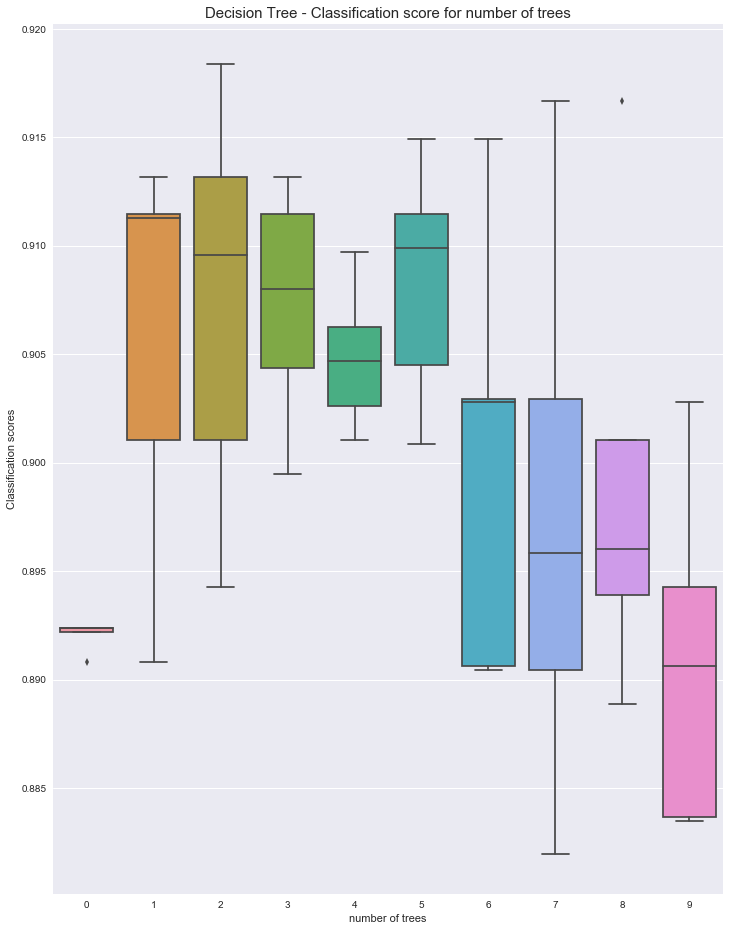

In [30]:
sns.boxplot(data=scores_DT2)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Decision Tree - Classification score for number of trees', fontsize=15)
plt.show()

We did a trial-and-error approach in the earlier section to see what depth specified for the Decision Tree gives better accuracy. Cross-validation approach was used to validate if the selected parameter was the right choice. The boxplots show that the accuracy tends to decrease after 6 number of trees. And the accuracy of the Decision Trees classifier in the earlier section is 90.4%.

In [31]:
#Applying cross validation to check what number of trees gives a better accuracy score

scores_RF2 = []

for val in range(1,8):
    clf_RF2 = RandomForestClassifier(n_estimators = 100,bootstrap=True,max_depth = val
                                     ,class_weight=None,criterion='entropy',random_state=0)
    validated = cross_val_score(clf_RF2, x_train, y_train, cv=5)
    scores_RF2.append(validated)
    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

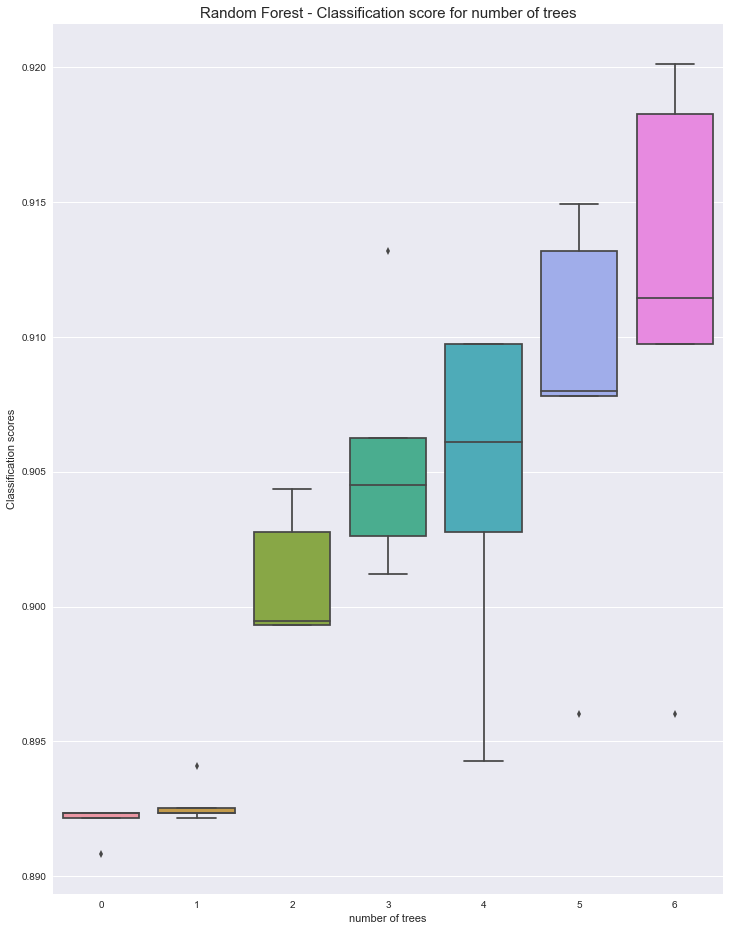

In [32]:
sns.boxplot(data=scores_RF2)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Random Forest - Classification score for number of trees', fontsize=15)
plt.show()

The boxplots show that accuracy score tends to increase with increase in the max_depth parameter. And also the trial-and-error approach in the earlier section generated better accuracy with max_depth set to 6. 

In [33]:
scores_NN2 = []

for val in range(1,10):
    clf_NN2 = MLPClassifier(activation='relu', max_iter=400, alpha=1e-05, hidden_layer_sizes=(val),random_state=1)
    validated = cross_val_score(clf_NN2, x_train, y_train, cv=5)
    scores_NN2.append(validated)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed w

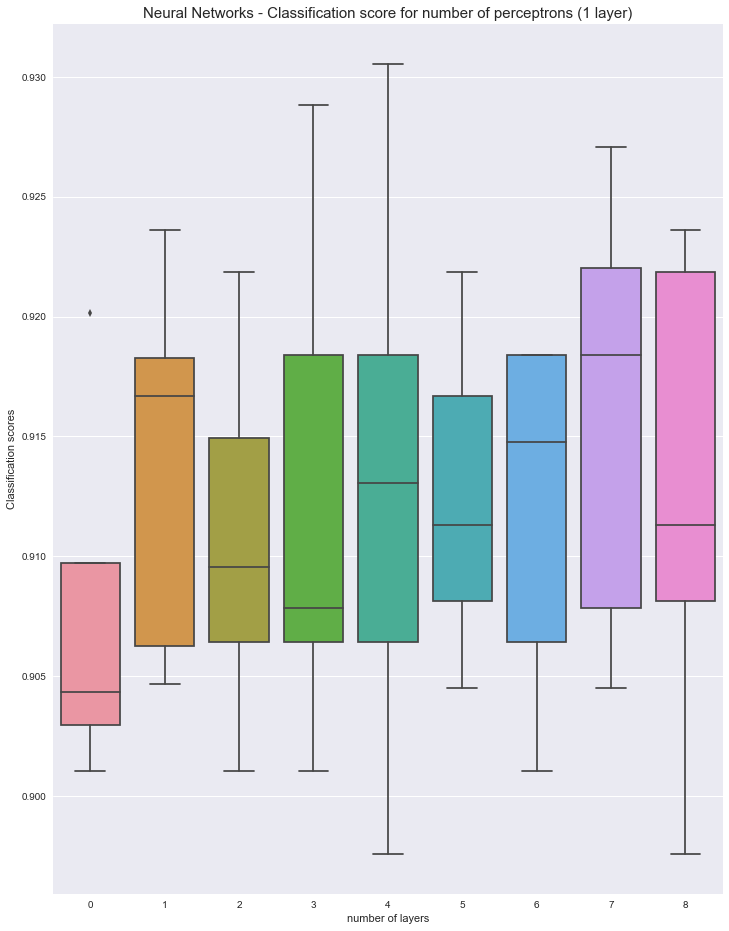

In [34]:
sns.boxplot(data=scores_NN2)
plt.xlabel('number of layers')
plt.ylabel('Classification scores')
plt.title('Neural Networks - Classification score for number of perceptrons (1 layer)', fontsize=15)
plt.show()

There's no rule of thumb for the number of hidden layers or the number of perceptrons in each hidden layer. We did a trial-and-error approach in the earlier section which generated better accuracy when one hidden layer of 4 perceptrons. The same results are visible in the boxplots, the accuracy decreases with 5 or more number of perceptrons. 

#### Decision Tree Algorithm

The algorithm that is used by sklearn Decision Tree Classifier is *Classification and Regression Trees (CART)*. CART uses a greedy approach in which decision trees are constructed in recursive divide-and-conquer manner. A greedy approach is referred to a situation in which the algorithm chooses the best option available at any given time, without taking future steps into account. 

CART generates a binary decision tree. The algorithm takes a training set and with the class labels and attributes. It uses a attribute selection method which determines splitting criterion. Since CART only generates binary trees, the algorithm at this step determines whether a particular attribute will result in a left or right branch. The splitting criterion ensures that each branch is as pure as possible. (A partition is pure if all tuples in it belong to a single class). The purity is quantified using Gini index. The steps are repeated until no split is possible.

#### Neural Network Algorithm

Initially, input features are determined as they correspond to the input nodes. This is called the input layer. The output layer consists of output nodes which correspond to the class labels. The hidden layer can be just one layer or multiple layer and there is no rule of thumb for number of perceptrons in the hidden layer(s). Each row in the training set is propagated through the network and the resulting class is determined. The predicted class is then compared to the actual class. If the class was predicted correctly, higher weights are given to this prediction. If the predicted class is incorrect, the weights are adjusted to give a lower output value for the class. The data values input through the input layer flow through the network with the final values resulting from the output layer. An activation function is applied to the data values and weights, which results in an output value. These steps are part of the propagation technique. The values and weights at each node are passed through an activation function and the resulting output is placed on the arc to be sent as input to the next nodes. 

Backward propagation is a learning technique in which weights are adjusted and propagated from the output layer to the input layer. The weights are adjusted due to difference in predicted and actual values. It uses a technique called gradient descent which finds a set of weights that minimize the mean squared error at the output node i.e., it gives the slope of the error function for one weight. The weights are thus adjusted such that the MSE is minimized and learned by the network. 


#### Random Forest Algorithm

Random Forests is an ensemble technique, which combines base classifiers to create and improved classification model. In this method, the data is divided into *k* training sets and each of the subset is used generate a classifier, so there will be *k* classifiers for each of the subset. Once a new data row is given to the ensemble to classify, it collects all class predictions from classifiers and outputs the result that's in majority. Random Forests use Decision Trees as base classifiers, so the collection of all classifiers is referred to as *forest*. Random Forests are built using another ensemble technique called *bagging*. Bagging is a method that is used to increase the accuracy. A training dataset is randomly sampled with replacement (bootstrap method) and samples are generated. Decision Tree classifier for each training set is used. Let *F* be the number of attributes which are used for splitting at each node of the Decision Tree. So *F* attributes are randomly selected at each node for the split. Then the CART method is used to grow the trees and are grown to the maximum size. Each of the classifier returns a class as predicted output, which is considered as a vote. Once voting is completed, the classifier assigns the class with the highest votes. 


#### 4. Create a few plots of your model on the test data, two of the data dimensions at a time, indicating the predicted elements of each class using different colors or shapes. You may need to try plotting various pairs of dimensions to see which provide some interesting result. Be sure to label your axis and legend. Why is separation better on some plots than others?

Text(0.5,1,'Decision Tree Classification - Predicted Points')

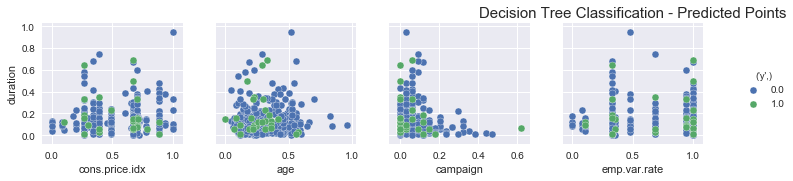

In [61]:
#print(type(y_pred_DT1))
y_pred_DT1_df = pd.DataFrame(y_pred_DT1,columns=[['y']],  index=None )
#test_y_pred_DT1.columns.values
#print(test_y_pred)

import seaborn as sns
paired_DT1 =  pd.concat([x_test, y_pred_DT1_df["y"]], axis=1)
#visualize the relationship between the features and the response using scatterplots

sns.pairplot(paired_DT1, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration', hue=('y',))
 
#print(paired_test.columns.values)
plt.title('Decision Tree Classification - Predicted Points',fontsize=15)
plt.show()

Text(0.5,1,'Decision Tree Classification - Predicted Points')

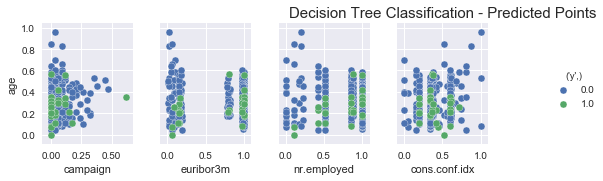

In [63]:

#visualize the relationship between the features and the response using scatterplots
sns.pairplot(paired_DT1, x_vars=[ 'campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age',  aspect=0.7, hue=('y',))
#print(paired_test.columns.values)
plt.title('Decision Tree Classification - Predicted Points',fontsize=15)
plt.show()

Text(0.5,1,'Neural Network Classification - Predicted Points')

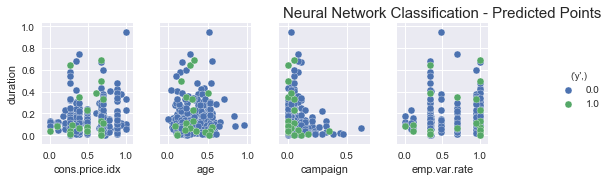

In [64]:
#print(type(y_pred_NN1))
y_pred_NN1_df = pd.DataFrame(y_pred_NN1,columns=[['y']],  index=None )
#print(type(y_pred_NN1_df))

paired_NN1 =  pd.concat([x_test, y_pred_NN1_df["y"]], axis=1)
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(paired_NN1, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration',   aspect=0.7, hue=('y',))
#print(paired_NN_1.columns.values)
plt.title('Neural Network Classification - Predicted Points',fontsize=15)
plt.show()

Text(0.5,1,'Neural Network Classification - Predicted Points')

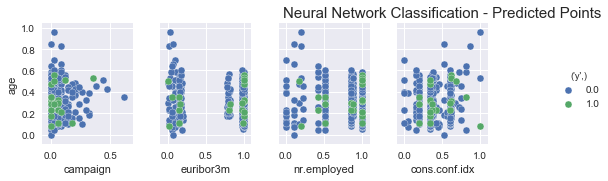

In [65]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(paired_NN1, x_vars=[ 'campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age', aspect=0.7, hue=('y',))
#print(paired_test.columns.values)
plt.title('Neural Network Classification - Predicted Points',fontsize=15)
plt.show()

Text(0.5,1,'Random Forest Classification - Predicted Points')

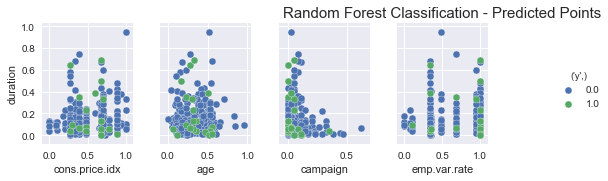

In [66]:
#print(type(y_pred_RF1))
y_pred_RF1_df = pd.DataFrame(y_pred_RF1,columns=[['y']],  index=None )
#print(type(y_pred_RF1_df))

paired_RF1 =  pd.concat([x_test, y_pred_RF1_df["y"]], axis=1)
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(paired_RF1, x_vars=['cons.price.idx','age', 'campaign','emp.var.rate'], y_vars='duration',   aspect=0.7, hue=('y',))
#print(paired_NN_1.columns.values)
plt.title('Random Forest Classification - Predicted Points',fontsize=15)
plt.show()

Text(0.5,1,'Neural Network Classification - Predicted Points')

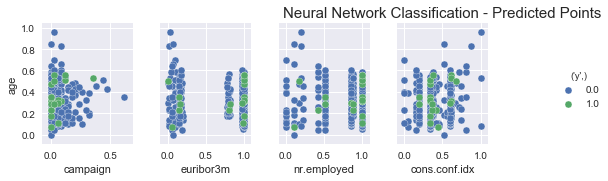

In [67]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(paired_RF1, x_vars=[ 'campaign','euribor3m','nr.employed','cons.conf.idx'], y_vars='age',  aspect=0.7, hue=('y',))
#print(paired_test.columns.values)
plt.title('Neural Network Classification - Predicted Points',fontsize=15)
plt.show()

The scatter plots show various pairs of features and the predicted points by each classifier. We can clearly see that Decision Trees have more data points predicted as 'Yes' as compared to Neural Networks, which is also evident from the classification metrics presented in the later parts. Whereas the results generated by Neural Networks and Random Forests are quite close. The dataset has a class imbalance, that is, almost 90% of the tuples in the dataset belong to the negative class ('No') whereas only 10% belong to the positive class ('Yes'). We can clearly see the class imbalance in the scatter plots. The separation seems to be better in Decision Trees because they perform well on imbalanced data than the other classifiers.

#### 5. Produce a table with the true/false positive/negative metrics as well as accuracies. Compare the values using bar charts

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt

print("Decision Tree Classification Metrics")
print(confusion_matrix(y_test,y_pred_DT1))  
print(classification_report(y_test,y_pred_DT1))
print(accuracy_score(y_test,y_pred_DT1))

Decision Tree Classification Metrics
[[1060   38]
 [  81   56]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1098
          1       0.60      0.41      0.48       137

avg / total       0.89      0.90      0.90      1235

0.9036437246963562


In [48]:
print("Random Forest Classification Metrics")
print(confusion_matrix(y_test,y_pred_RF1))  
print(classification_report(y_test,y_pred_RF1))
print(accuracy_score(y_test,y_pred_RF1))


Random Forest Classification Metrics
[[1086   12]
 [ 102   35]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1098
          1       0.74      0.26      0.38       137

avg / total       0.90      0.91      0.89      1235

0.9076923076923077


In [49]:
print("Neural Network Classification Metrics")
print(confusion_matrix(y_test,y_pred_NN1))  
print(classification_report(y_test,y_pred_NN1))
print(accuracy_score(y_test,y_pred_NN1))


Neural Network Classification Metrics
[[1078   20]
 [ 102   35]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.95      1098
          1       0.64      0.26      0.36       137

avg / total       0.88      0.90      0.88      1235

0.9012145748987854


In [68]:
DT_acc = accuracy_score(y_test,y_pred_DT1)
DT_prec = precision_score(y_test,y_pred_DT1)
DT_rec = recall_score(y_test,y_pred_DT1)
DT_f1 = f1_score(y_test,y_pred_DT1)

y_ax_dt = np.array([DT_acc,DT_prec,DT_rec,DT_f1])
x_ax_dt = ['Accuracy','Precision','Recall','F1']
clf_dt = ['Decision Tree','Decision Tree','Decision Tree','Decision Tree']
#print(type(y_ax_dt))

d_dt = {'Metrics':x_ax_dt,'Scores':y_ax_dt, 'Classifier':clf_dt }
df_dt = pd.DataFrame(d_dt, columns=['Metrics', 'Scores', 'Classifier'])


In [69]:
RF_acc = accuracy_score(y_test,y_pred_RF1)
RF_prec = precision_score(y_test,y_pred_RF1)
RF_rec = recall_score(y_test,y_pred_RF1)
RF_f1 = f1_score(y_test,y_pred_RF1)

y_ax_rf = np.array([RF_acc,RF_prec,RF_rec,RF_f1])
x_ax_rf = ['Accuracy','Precision','Recall','F1']
clf_rf = ['Random Forest','Random Forest','Random Forest','Random Forest']

#print(type(y_ax_dt))

d_rf = {'Metrics':x_ax_rf,'Scores':y_ax_rf, 'Classifier':clf_rf}


df_rf = pd.DataFrame(d_rf, columns=['Metrics', 'Scores', 'Classifier'])
df_all = df_dt.append(df_rf, ignore_index=True)


In [70]:
NN_acc = accuracy_score(y_test,y_pred_NN1)
NN_prec = precision_score(y_test,y_pred_NN1)
NN_rec = recall_score(y_test,y_pred_NN1)
NN_f1 = f1_score(y_test,y_pred_NN1)

y_ax_nn = np.array([NN_acc,NN_prec,NN_rec,NN_f1])
x_ax_nn = ['Accuracy','Precision','Recall','F1']
clf_nn = ['Neural Network','Neural Network','Neural Network','Neural Network']
#print(type(y_ax_dt))

d_nn = {'Metrics':x_ax_nn,'Scores':y_ax_nn,'Classifier':clf_nn}
df_nn = pd.DataFrame(d_nn, columns=['Metrics', 'Scores', 'Classifier'])
df_all = df_all.append(df_nn, ignore_index = True)


In [53]:
df_all.head(20)

,Metrics,Scores,Classifier
0,Accuracy,0.903644,Decision Tree
1,Precision,0.595745,Decision Tree
2,Recall,0.408759,Decision Tree
3,F1,0.484848,Decision Tree
4,Accuracy,0.907692,Random Forest
5,Precision,0.744681,Random Forest
6,Recall,0.255474,Random Forest
7,F1,0.380435,Random Forest
8,Accuracy,0.901215,Neural Network
9,Precision,0.636364,Neural Network


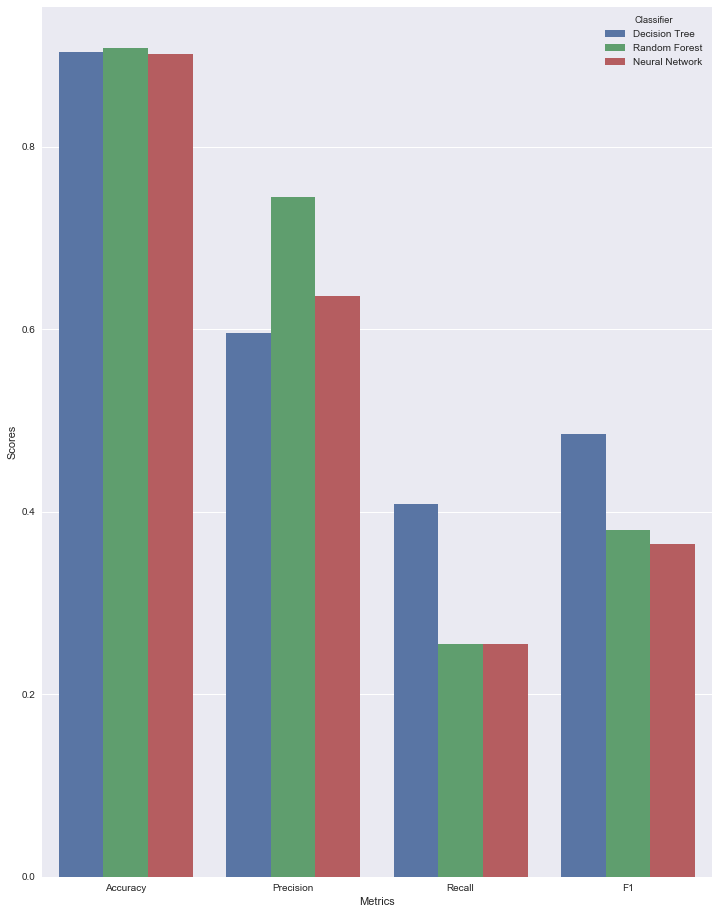

In [54]:
ax=sns.barplot(x='Metrics', y='Scores', hue='Classifier', data=df_all)

plt.show()

#### 6. Provide a short explanation of the results you have shown and what it means. Which classification method performed better? Why? Contrast performance with classification from the previous homework and comment on the difference, if any.

The accuracy of each classifier, Decision Tree, Random Forest and Neural Network are almost similar. Random Forest classified the data with an accuracy of 90.7% (approx. 91%) and Decison Tree and Neural Network classifications resulted in accuracies of 90% each. This means that almost 90% of the test tuples were predicted correctly. 

Precision measures of each classifier show that the highest precision generated by Random Forest classifier (74%), while the second highest was of Neural Network (~64%) and that of Decision Tree was 59%. The precision measure shows the percentage of tuples labeled 'Yes' were predicted 'Yes'. 

Recall measures of Random Forest and Neural Network were equal (25.5%) where as that of Decision Tree was 43.7%. Recall tells us the percentage of tuples classified 'Yes' out of the sum of: those tuples classified 'Yes' (and were actually 'Yes') PLUS those tuples classified 'No' which were actually 'Yes'. 

Since, the recall for all the classifiers is not higher than precision, we can conclude that the models are not biased towards the positive class. 

F1 measures of Random Forest and Neural Network were quite close with values of 38% and 36.4% respectively. Whereas, the highest F1 was observed by Decision Tree classification. F1 is the harmonic mean of precision and recall and proves to be a better measure than accuracy with unbalanced dataset.

Previous results of KNN & SVM show that KNN and SVM had almost similar accuracies 90% and 91% respectively, however, KNN generated better precision than SVM. In terms of recall, SVM had a better score than KNN which was balanced in F1 measure, as it was higher than that of KNN. The results were such due to unbalanced classes, because SVM does not work well with unbalanced data. 

The recall of SVM was higher than that of KNN, Random Forest and Neural Network, while the precision scores of KNN and SVM were higher than the remaining classifiers.

The results give a good comparison of different classifiers, and by comparing values, we can conclude that Random Forest classifier performed better than the rest of the classifiers in terms of accuracy and precision. Whereas, the Decision Tree supercede the other classifiers in terms of recall and F1 measure. The reason being that the dataset had highly unbalanced classes, and since Decision Tree creates IF/Then rules for the tuples, it's better at handling unbalanced classes than the other classifiers that were applied.  


#### Techniques to handle class-imbalance problems

1. Oversampling: This technique could be used to resample the positive data tuples such that there are equal number of positives and negatives in the training set.

2. Undersampling: This technique attempts to reduce the number of negative tuples, i.e., randomly eliminates negative tuples until the number of negatives and positives are equal.

3. Ensemble methods such as bagging, boosting, Adaboost etc could be used in combination with oversampling/undersampling to have better prediction results. 

# Assignment 2 Part B - Question 1,2,3,4,5

In [59]:
import pandas as pd
import numpy as np
import io
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config IPCompleter.greedy=True
import seaborn as sns
from sklearn import svm

In [0]:
# Loading Data Set
dataframe  =pd.read_csv("~/DataDNA.csv")

In [0]:
dataframe.head()
dataframe.dtypes
dataframe.describe()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
0,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
1,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
2,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
3,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1
4,3,2,3,1,2,3,4,3,1,4,...,2,2,2,3,4,2,2,2,2,-1


1       int64
2       int64
1.1     int64
2.1     int64
1.2     int64
2.2     int64
3       int64
3.1     int64
3.2     int64
3.3     int64
1.3     int64
2.3     int64
1.4     int64
3.4     int64
4       int64
2.4     int64
1.5     int64
2.5     int64
2.6     int64
2.7     int64
1.6     int64
1.7     int64
2.8     int64
3.5     int64
1.8     int64
4.1     int64
2.9     int64
2.10    int64
1.9     int64
4.2     int64
2.11    int64
2.12    int64
1.10    int64
4.3     int64
2.13    int64
2.14    int64
1.11    int64
2.15    int64
1.12    int64
1.13    int64
2.16    int64
2.17    int64
1.14    int64
4.4     int64
2.18    int64
3.6     int64
3.7     int64
4.5     int64
3.8     int64
2.19    int64
3.9     int64
4.6     int64
2.20    int64
2.21    int64
2.22    int64
2.23    int64
1.15    int64
1.16    int64
dtype: object

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,...,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,2.493861,2.529786,2.507503,2.527058,2.548431,2.492951,2.549795,2.541155,2.552979,2.564802,...,2.498408,2.497499,2.438836,2.495225,2.482492,2.436107,2.500682,2.456571,2.512960,0.033197
std,1.103734,1.086730,1.097940,1.118978,1.081441,1.099599,1.110029,1.103808,1.126967,1.108433,...,1.104986,1.070690,1.093767,1.087128,1.065865,1.089860,1.092149,1.093367,1.086224,0.999676
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,-1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


## Question 1

In [0]:
from sklearn.preprocessing import StandardScaler # Library for Z-score normalization
sc = StandardScaler()
dataframe_normd = sc.fit_transform(dataframe.iloc[:,0:57]) # data is now normalized for the input dimensions

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
dataframe_normd = pd.DataFrame(dataframe_normd) # Load the data on a pandas dataframe

We use Z-score normalization over Min-Max scaling as we would like our data to follow a normal distribution of the for N(0,1)

In [0]:
data_normd = pd.concat([dataframe_normd, dataframe['1.16']], axis = 1) # concatening data frame with outcome variable

Justify why you would normally split the test and training set
randomly. 

Ans. We split the data into train and tests sets randomly so that our proposed model is made to fit and learn from the train data. 

After the learning stage to predict the outcome values on the dimensions of the train data set and compare the predicted outcomes to actual outcomes of the train dataset.

In [0]:
data_normd.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,1.16
0,0.458674,0.432785,1.359670,-0.471124,-1.432148,-0.448403,-0.495411,1.321948,0.396749,-0.509666,...,-1.356351,1.403621,0.513173,1.384490,1.424058,1.435275,-1.374377,0.497136,1.369311,1
1,1.364896,-1.408017,1.359670,1.316628,1.342560,1.370856,-1.396493,-1.396534,-0.490790,-1.412046,...,-1.356351,-0.464758,-1.315786,-1.375703,1.424058,-0.400241,-0.458542,1.411950,1.369311,1
2,-1.353769,1.353186,-1.373342,-1.365001,0.417657,0.461226,1.306754,1.321948,0.396749,1.295093,...,-1.356351,0.469431,0.513173,1.384490,-1.391199,0.517517,0.457293,1.411950,-0.472349,-1
3,0.458674,1.353186,1.359670,0.422752,-1.432148,-1.358032,1.306754,1.321948,1.284289,-1.412046,...,0.454038,-1.398948,0.513173,-0.455639,-1.391199,1.435275,-0.458542,-1.332492,-1.393179,-1
4,0.458674,-0.487616,0.448666,-1.365001,-0.507245,0.461226,1.306754,0.415787,-1.378330,1.295093,...,-0.451157,-0.464758,-0.401306,0.464425,1.424058,-0.400241,-0.458542,-0.417678,-0.472349,-1


In [0]:
plus_one = len(data_normd[data_normd['1.16'] == 1])
minus_one = data_normd['1.16'].count() - plus_one
print(data_normd['1.16'].unique()) # classes are +1 and -1
print(plus_one)
print(minus_one)
X = np.array(data_normd.iloc[:, 0:57])
Y = np.array(data_normd.iloc[:, 57])

[ 1 -1]
1136
1063


No. of +1 is: 1136

No. of -1 is: 1063

So the classes are almost balanced. No is no evident issue of class imbalance in the output variable.

## Question 2

### Part (a)

In [0]:
# To run a 5-fold cross validation, we need to split the data into 5 parts. Wherein 1 part will be used as test data and remaining 4 parts will be train data.
# We need to import KFold library from sklearn.model_selection

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_vals = [x for x in range(1,32) if x%2 != 0]
#print(k_vals)
scores = []

for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors = k)
  acc = cross_val_score(knn, X, Y, cv = 5, scoring = 'accuracy')
  scores.append(acc.mean())

In [0]:
scores

[0.7367253822216401,
 0.7435570384708035,
 0.7499155306493412,
 0.7467202802982171,
 0.7626325103106749,
 0.7480828718593118,
 0.7440012579892177,
 0.7426231540452173,
 0.7417130277250681,
 0.7421696533932135,
 0.74262833579625,
 0.7367212969263084,
 0.735356620455872,
 0.7312739664789779,
 0.7294278755196426,
 0.7307925472943371]

In [0]:
# calculating error percentage
error = [(1-x) for x in scores]

# We shall choose the value of K that gives the least value of error
print("Optimal K value from 5-fold cross validation is: ", k_vals[error.index(min(error))])

Optimal K value from 5-fold cross validation is:  9


Text(0.5, 0, 'K-value')

Text(0, 0.5, 'Accuracy Score')

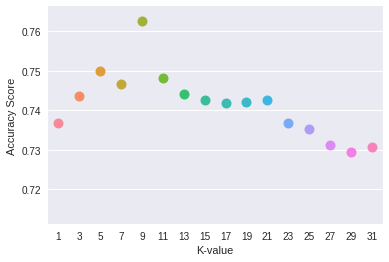

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.gca()
ax.yaxis.grid(True)
sns.swarmplot(k_vals, scores, size = 10, )
plt.xlabel("K-value")
plt.ylabel("Accuracy Score")

As you can see from the plot that maximum classification accuracy is observed when K Neighbors value is taken as 9.

Q.  Explain why you didnt evaluate directly on the test set.

A. We did not directly evaluate KNN model on the test set, instead we did a 5-fold cross validation. If had run the same test set for different values of K, we are underestimating the true error rate. It is to say that we are forcing our model to fit the test set. Then our model becomes incapable of generalizing newer input values which leads to overfitting.

Using the test set for hyperparameter tuning can lead to overfitting.

### Part (b)

In [0]:
from sklearn import svm

C = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
sigma = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
scores = []
for c,sig in zip(C, sigma):
  model = svm.SVC(kernel = 'rbf', C = c, gamma = sig)
  acc = cross_val_score(model, X, Y, cv = 5, scoring = 'accuracy', )
  scores.append(acc.mean())

In [0]:
# We would have got optimal values for C and sigma where our score value is maximum.
#scores.index(max(scores))
print("Optimal value of C: ", C[scores.index(max(scores))])
print("Optimal value of sigma:", sigma[scores.index(max(scores))])

Optimal value of C:  0.1
Optimal value of sigma: 0.01


In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, f1_score
from scipy import interp

<Figure size 1080x1080 with 0 Axes>

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

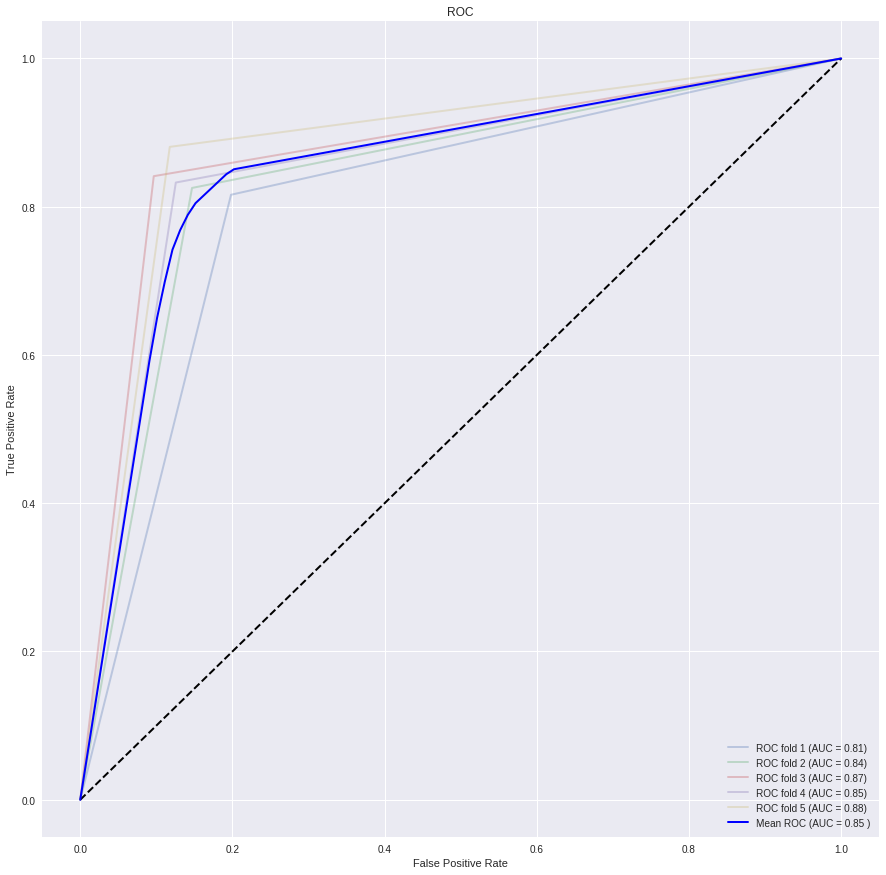

In [0]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
plt.figure(figsize=(15,15))
five_fold = KFold(n_splits = 5)
for train_i, test_i in five_fold.split(X):
  X_train, X_test = X[train_i], X[test_i]
  Y_train, Y_test = Y[train_i], Y[test_i]
  sv = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
  sv.fit(X_train, Y_train)
  Y_pred = sv.predict(X_test)
  fpr, tpr, t = roc_curve(Y_test, Y_pred)
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

Above plot shows the ROC curves for 5-fold cross-validation for SVM model with RBF kernel with C=0.1 and sigma = 0.01. 

# Question 3 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, f1_score
from sklearn import svm
import io

In [0]:
dfb = pd.read_csv("~/DataDNA.csv")

In [0]:
dfb.head()
dfb.shape

,fe1,fe2,fe3,fe4,fe5,fe6,fe7,fe8,fe9,fe10,...,fe49,fe50,fe51,fe52,fe53,fe54,fe55,fe56,fe57,outcome
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


(2200, 58)

# Checking Class Variation

% of passanger with outcome 1 in train dataset:  51.68181818181818
% of passanger with outcome -1 in train dataset:  48.31818181818182


Text(0.5,1,'Count of Outcome')

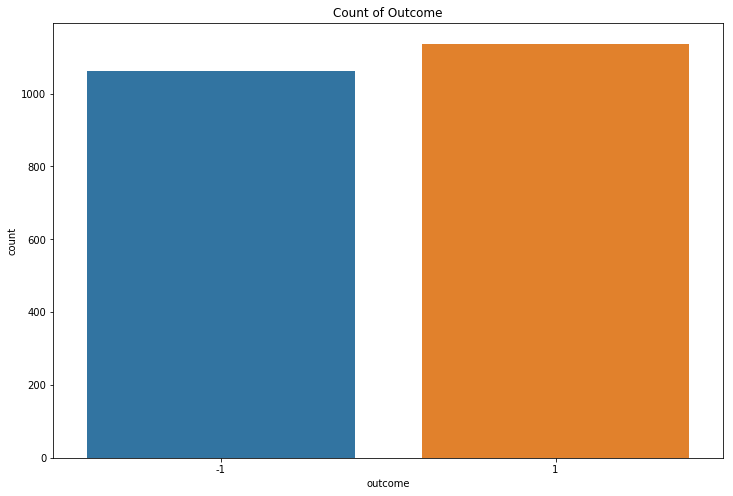

In [0]:
n=len(dfb)
surv_0=len(dfb[dfb['outcome']==-1])
surv_1=len(dfb[dfb['outcome']==1])

print("% of passanger with outcome 1 in train dataset: ",surv_1*100/n)
print("% of passanger with outcome -1 in train dataset: ",surv_0*100/n)


fig , ax = plt.subplots(figsize=(12,8))
sns.countplot(x='outcome', data=dfb)
plt.title("Count of Outcome")
plt.show()

# Checking correlation 

In [0]:
cor=dfb.corr()

Text(0.5,1,'Correlation Plot')

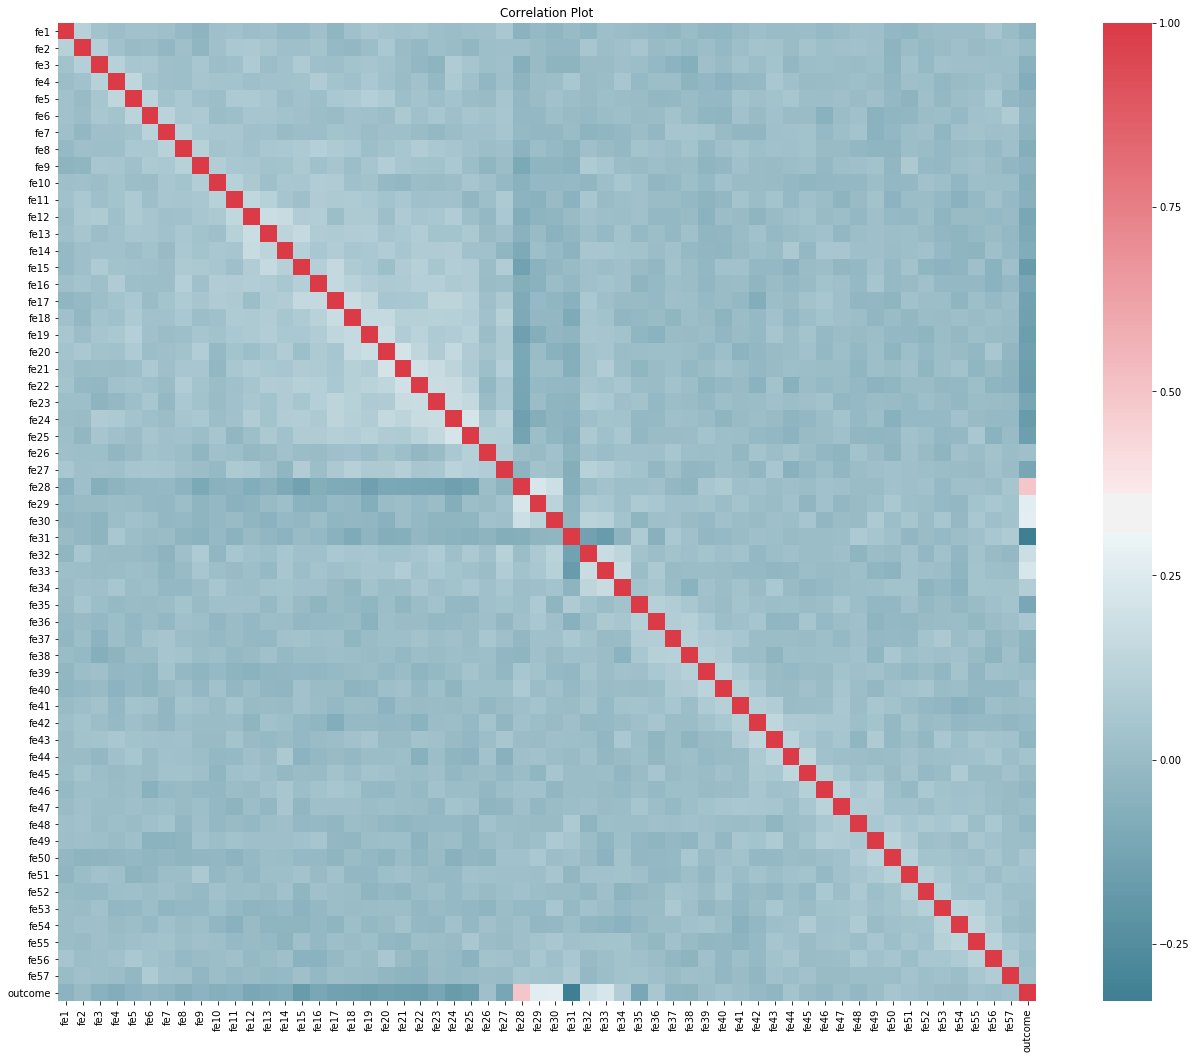

In [0]:
fig, ax =plt.subplots(figsize=(24, 18))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# Normalizing fe1-fe57

In [0]:
z_normalized = stats.zscore(dfb.iloc[:,0:57])
df = pd.DataFrame(z_normalized)
df.shape
df.head(5)

(2200, 57)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.352898,-0.487479,-1.372441,-0.470994,-1.431156,-0.448281,0.405564,0.415676,0.396645,0.392611,...,1.424712,0.453914,-0.464630,0.513026,1.383572,-0.452656,-0.400135,-0.458416,-0.417566,-1.392249
1,0.459203,0.433082,1.360021,-0.470994,-1.431156,-0.448281,-0.495689,1.322008,0.396645,-0.509943,...,0.490475,-1.356803,1.404083,0.513026,1.383572,1.424521,1.435731,-1.374415,0.497419,1.369651
2,1.365253,-1.408039,1.360021,1.317075,1.342890,1.371309,-1.396943,-1.396986,-0.491065,-1.412496,...,-1.378000,-1.356803,-0.464630,-1.316240,-1.376046,1.424521,-0.400135,-0.458416,1.412405,1.369651
3,-1.352898,1.353642,-1.372441,-1.365028,0.418208,0.461514,1.306817,1.322008,0.396645,1.295164,...,-0.443763,-1.356803,0.469726,0.513026,1.383572,-1.391244,0.517798,0.457583,1.412405,-0.471615
4,0.459203,1.353642,1.360021,0.423041,-1.431156,-1.358075,1.306817,1.322008,1.284354,-1.412496,...,1.424712,0.453914,-1.398986,0.513026,-0.456173,-1.391244,1.435731,-0.458416,-1.332552,-1.392249


In [0]:
##### Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(dfb['outcome'])


# Setting features (57)
features= df

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

features.shape
labels.shape

(2200, 57)

(2200,)

# Data Set Split 70/30 (training / test)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3,
                                                                           random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1540, 57)
Training Labels Shape: (1540,)
Testing Features Shape: (660, 57)
Testing Labels Shape: (660,)


# Question 2 Part 3 Task A

## Classifier 1 : KNN

In [0]:
# Test set evaluation using KNN with k=9

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 10)
knn = KNeighborsClassifier(n_neighbors = 9, )
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

### Make Predictions on Test Data

In [0]:
Y_pred = knn.predict(X_test)
print("\nAccuracy Score = %0.2f" % accuracy_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))


Accuracy Score = 0.76
F1 Score: 0.7042253521126762


From the above KNN classifier we observe an accuracy of 76% and an f1 score of 0.70.

## Classifier 2 : SVM

In [0]:
# Test set evaluation using SVM with soft margin C=5 and sigma = 1

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 33)
model = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
model.fit(X_train, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Make Predictions on Test Data

In [0]:
Y_pred = model.predict(X_test)
print("\nAccuracy Score = %0.2f" % accuracy_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))


Accuracy Score = 0.85
F1 Score: 0.8607068607068608


From the above KNN classifier we observe an accuracy of 85% and an f1 score of 0.86.

## Classifier 3 : Training Forest

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate model 
rf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [15,20,14],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True,False]
}

# Train the model on training data using GridSearch
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rfc.fit(train_features, train_labels)


#Grid Search Best Parameters
CV_rfc.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [15, 20, 14], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 500}

In [0]:
#Initiate the model with GridSearch Parameters

rf_grid = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',
                                 bootstrap=False,random_state=43)

# Train the model on training data
start = time.time()
rf_grid.fit(train_features, train_labels)
end = time.time()

print("training time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

training time: 2.604 s


### Make Predictions on Test Data

In [0]:
# Use the forest's predict method on the test data
start = time.time()
predictions=rf_grid.predict(test_features)
end = time.time()

print("test time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.106 s


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy based on 57 Features:",round(metrics.accuracy_score(test_labels, predictions),4))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on 57 Features:",round(metrics.precision_score(test_labels, predictions),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on 57 Features:",round(metrics.recall_score(test_labels, predictions),3))

Accuracy based on 57 Features: 0.9697
Precision based on 57 Features: 0.978
Recall based on 57 Features: 0.96


## Classifier 4: Training Neural Network

In [0]:
# Import the model we are using
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV

parameters = {
    'solver': ['lbfgs'], 
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter': [100,200], 
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes': (np.arange(1, 7),np.arange(1, 7),np.arange(1, 7)), 
    'random_state':[0,1,2,3,4,5,6,7,8,9]
}

# Train the model on training data using GridSearch
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(train_features, train_labels)


#Grid Search Best Parameters
clf_grid.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'max_iter': [100, 200], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'hidden_layer_sizes': (array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6])), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=Non

{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': array([1, 2, 3, 4, 5, 6]),
 'max_iter': 200,
 'random_state': 2,
 'solver': 'lbfgs'}

In [0]:
#Initiate the model with GridSearch Parameters
start_nu = time.time()
nu = neural_network.MLPClassifier(alpha=0.0001, hidden_layer_sizes = (np.arange(1, 6)), 
                                  max_iter=200, random_state=2, solver='lbfgs',activation='identity')

# Train the model on training data
nu.fit(train_features, train_labels)
end_nu = time.time()

print("train time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

train time: 0.142 s


### Testing Model on Test Data

In [0]:
start_nu = time.time()
neural_predictions=0
neural_predictions = nu.predict(test_features)
end_nu = time.time()


print("test time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.002 s


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, neural_predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_labels, neural_predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_labels, neural_predictions))

Accuracy: 0.8424242424242424
Precision: 0.8369230769230769
Recall: 0.8421052631578947


# Question 2 Part 3 Task B

## 5th Classifier (Variation of Random Forest) 
Perform a greater param grid search.

Perform parameter selection on a wider range using GridSearchCV and monitor accuracy based on that, enabling boosting.

I will also find out the feature importance and check accuracy just on those features performing gridsearch using those features alone.

### Feature Importance from Random Forest Model from Task A

In [0]:
# Get numerical feature importances
importances = list(rf_grid.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   27 Importance: 0.14
Variable:                   28 Importance: 0.12
Variable:                   30 Importance: 0.08
Variable:                   29 Importance: 0.07
Variable:                   26 Importance: 0.04
Variable:                   31 Importance: 0.03
Variable:                   32 Importance: 0.03
Variable:                   33 Importance: 0.03
Variable:                   14 Importance: 0.02
Variable:                   20 Importance: 0.02
Variable:                   21 Importance: 0.02
Variable:                   23 Importance: 0.02
Variable:                   24 Importance: 0.02
Variable:                    0 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable:                    4 Importance: 0.01
Variable:                    5 Importance: 0.01
Variable:                    6 Importance: 0.01
Variable:                    7 Importanc

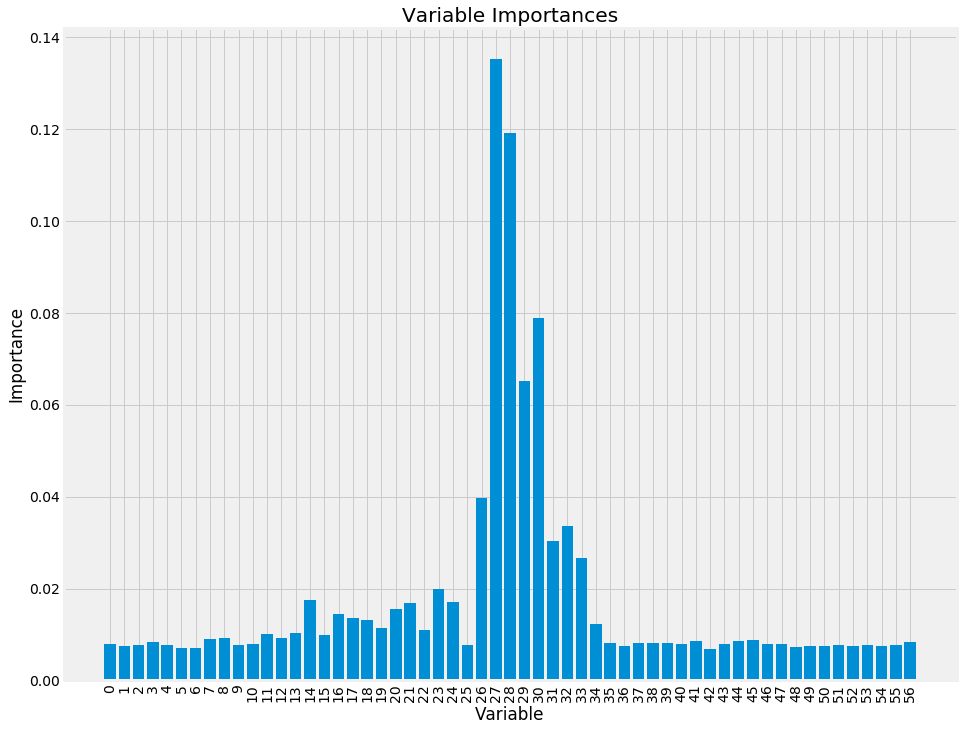

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(16,12))

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 


In [0]:
# New random forest with only the 11 most important variables using Parameters from Previous Part 3 A.
rf_most_important = RandomForestClassifier(random_state=43,n_estimators = 1000, criterion = 'gini', max_depth = 15, max_features= 'log2',bootstrap=False)

# Extract the  most important features
important_indices = [feature_list.index(27), feature_list.index(28),feature_list.index(30),feature_list.index(29),
                    feature_list.index(26),feature_list.index(31),feature_list.index(32),feature_list.index(33),
                    feature_list.index(21),feature_list.index(23),feature_list.index(24)
                    ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
important_indices
test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)


# Make predictions and determine the error
prediction_imp = rf_most_important.predict(test_important)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy based on Task 3 A Model using 11 Important Features:",round(metrics.accuracy_score(test_labels, prediction_imp),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on Task 3 A Model using 11 Important Features:",round(metrics.precision_score(test_labels, prediction_imp),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on Task A Model using 11 Important Features:",round(metrics.recall_score(test_labels, prediction_imp),3))

[27, 28, 30, 29, 26, 31, 32, 33, 21, 23, 24]

array([[ 0.01576221, -0.31813363,  0.9423992 , ...,  0.34660748,
         1.24280017,  0.29507222],
       [-0.85115924, -1.44881858, -0.77673698, ..., -0.56551747,
        -0.57815246, -0.60031934],
       [ 1.7496051 ,  0.81255132, -1.63630507, ...,  0.34660748,
        -1.48862878,  0.29507222],
       ...,
       [ 0.88268365,  0.81255132,  0.9423992 , ..., -1.47764242,
         1.24280017,  1.19046377],
       [ 0.01576221, -1.44881858,  0.9423992 , ...,  0.34660748,
         1.24280017, -0.60031934],
       [ 1.7496051 , -0.31813363, -0.77673698, ...,  1.25873243,
         1.24280017, -0.60031934]])

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

Accuracy based on Task 3 A Model using 11 Important Features: 0.961
Precision based on Task 3 A Model using 11 Important Features: 0.977
Recall based on Task A Model using 11 Important Features: 0.941


### Note
Using the top 11 features and training the previous model from Task 3 A we got an accuracy of 96%. We will now use these important features and find out a tree that will BEST work on it and try get a better accuracy from the previous 96.9% that used all the features.

### Using important features ONLY and applying GridSearch to find best parameters to train & test Random Forest on

In [0]:
# Instantiate model 
rf = RandomForestClassifier(random_state=44)

param_grid = { 
    'n_estimators': [500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [15,14,17,21],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True,False]
}

# Train the model on training data using GridSearch
CV_rfc_imp = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rfc_imp.fit(train_important, train_labels)


#Grid Search Best Parameters
CV_rfc_imp.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=44, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [15, 14, 17, 21], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 1000}

In [0]:
#Initiate the model with GridSearch Parameters

rf_grid_imp = RandomForestClassifier(n_estimators = 1000,criterion = 'gini', max_depth = 15, 
                                     max_features= 'auto',bootstrap=True,random_state=45)

# Train the model on training data
start = time.time()
rf_grid_imp.fit(train_features, train_labels)
end = time.time()

print("training time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

training time: 2.897 s


In [0]:
# Use the forest's predict method on the test data
start = time.time()
predictions_important=rf_grid_imp.predict(test_features)
end = time.time()

print("test time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.186 s


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy based on Classifier 5 using 11 Important Features from task 3A:",round(metrics.accuracy_score(test_labels, predictions_important),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A:",round(metrics.precision_score(test_labels, predictions_important),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on Classifier 5 based on 11 Important Features from task 3A:",round(metrics.recall_score(test_labels, predictions_important),3))

Accuracy based on Classifier 5 using 11 Important Features from task 3A: 0.974
Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A: 0.987
Recall based on Classifier 5 based on 11 Important Features from task 3A: 0.96


### Conclusion for using classifier 5

#### Using 57 Features:
##### RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',bootstrap=False)
1. Accuracy based on 57 Features: 0.9697
2. Precision based on 57 Features: 0.978
3. Recall based on 57 Features: 0.96

#### Using 11 Features with Classifier 5:
##### RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth = 15,  max_features= 'auto',bootstrap=True,random_state=43)
1. Accuracy based on Classifier 5 using 11 Important Features from task 3A: 0.974
2. Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A: 0.987
3. Recall based on Classifier 5 based on 11 Important Features from task 3A: 0.96

#### Conclusion
Using just 11 features and Bootstrap we were able to get a better result of using the Classifier 5 (variation of Random Forest).
The training time was also better from 2.063 to 1.462 on the training and from 0.11 to 0.10 on test set. A noticeable difference on such small data set.

### Visualizing a Single Decision Tree of Classifier 5

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_grid_imp.estimators_[102]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [0]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 15


![tree.png](attachment:tree.png)

## 6th Classifier (Variation of Neural Network) 

consider a deeper neural networkwith multiple layers, use di erent optimization/solver algorithms, 

In [0]:
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes': (10,10,5,10), 
    'random_state':[0,1]
}

# Train the model on training data using GridSearch
nu_variation = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
nu_variation.fit(train_features, train_labels)


#Grid Search Best Parameters
nu_variation.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'hidden_layer_sizes': (10, 10, 5, 10), 'random_state': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': 10,
 'random_state': 1,
 'solver': 'lbfgs'}

In [0]:
#Initiate the model with GridSearch Parameters
start_nu = time.time()
nu_var = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes = (10), 
                                  max_iter=100, random_state=1, solver='lbfgs',activation='relu')

# Train the model on training data
nu_var.fit(train_features, train_labels)
end_nu = time.time()

print("train time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

train time: 0.528 s


In [0]:
start_nu = time.time()
neural_var_predictions=0
neural_var_predictions = nu_var.predict(test_features)
end_nu = time.time()


print("test time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.005 s


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, neural_var_predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_labels, neural_var_predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_labels, neural_var_predictions))

Accuracy: 0.9106060606060606
Precision: 0.9099378881987578
Recall: 0.9071207430340558


### Steps undertaken:

1. Take a different paramter grid search for hypter tuning and giving a new set of hidden layers for the gridSearchCV to search from
2. Applying the best parameters based on the result on the train and test data

### Conclusion for Classifier 6
Performance improved drastically, from 84.24% to 91.6% just in accuracy, by using the different activation function and number of layers/neurons in hidden layer

# Question 2 Part 3 Task C

### KNN (Classifier 1) Run 20 Times 

In [0]:
#knnmber of Runs set to N
N=20
training_time_knn=[]
test_time_knn=[]
accuracy_knn_recur=[]
precision_knn_recur=[]
recall_knn_recur=[]
f1_knn_recur=[]

#Training Data
knn_recur =  KNeighborsClassifier(n_neighbors = 9, )
    
# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_knn_recur, test_features_knn_recur, train_labels_knn_recur, test_labels_knn_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
      
    # Train the model on training data
    knn_recur_start = time.time()
    #training
    knn_recur.fit(train_features_knn_recur, train_labels_knn_recur)
    
    knn_recur_end = time.time()
    training_time_knn.append(round(knn_recur_end - knn_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    knn_test_start = time.time()
    
    #prediction
    knn_recur_prediction=knn_recur.predict(test_features_knn_recur)
    
    knn_test_end = time.time()
    test_time_knn.append(round(knn_test_end - knn_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_knn_recur.append(round(metrics.accuracy_score(test_labels_knn_recur, knn_recur_prediction),4))
   
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_knn_recur.append(round(metrics.precision_score(test_labels_knn_recur, knn_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_knn_recur.append(round(metrics.recall_score(test_labels_knn_recur, knn_recur_prediction),3))
    
     #Model F1 Measure
    f1_knn_recur.append(round(metrics.f1_score(test_labels_knn_recur, knn_recur_prediction),3))
    
mean_acc_knn=np.mean(accuracy_knn_recur)
mean_prec_knn=np.mean(precision_knn_recur)
mean_rec_knn=np.mean(recall_knn_recur)
mean_f1_knn=np.mean(f1_knn_recur)

sd_acc_knn=np.std(accuracy_knn_recur)
sd_prec_knn=np.std(precision_knn_recur)
sd_rec_knn=np.std(recall_knn_recur)
sd_f1_knn=np.std(f1_knn_recur)

avg_test_knn=np.mean(test_time_knn)
avg_train_knn=np.mean(training_time_knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [0]:
print("Average Mean of Accuracies of KNN is:  %g" % round(mean_acc_knn,4),"With %g Iterations" % N)
print("Average Mean of Precision of KNN is:  %g" % round(mean_prec_knn,3),"With %g Iterations" % N)
print("Average Mean of Recall of KNN is:  %g" % round(mean_rec_knn,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of KNN is:  %g" % round(mean_f1_knn,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of KNN is:  %g" % round(avg_test_knn,3),"With %g Iterations" % N)
print("Average Mean of Test Time of KNN is:  %g" % round(avg_train_knn,3),"With %g Iterations" % N)
print("\n")

print("Standard Deviation of Accuracies of KNN is:  %g" % round(sd_acc_knn,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of KNN is:  %g" % round(sd_prec_knn,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of KNN is:  %g" % round(sd_rec_knn,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure of KNN is:  %g" % round(sd_f1_knn,3),"With %g Iterations" % N)

Average Mean of Accuracies of KNN is:  0.7517 With 20 Iterations
Average Mean of Precision of KNN is:  0.947 With 20 Iterations
Average Mean of Recall of KNN is:  0.549 With 20 Iterations
Average Mean of F1 measure of KNN is:  0.694 With 20 Iterations


Average Mean of Training Time of KNN is:  0.159 With 20 Iterations
Average Mean of Test Time of KNN is:  0.01 With 20 Iterations


Standard Deviation of Accuracies of KNN is:  0.02 With 20 Iterations
Standard Deviation of Precision of KNN is:  0.021 With 20 Iterations
Standard Deviation of Recall of KNN is:  0.037 With 20 Iterations
Standard Deviation of F1 measure of KNN is:  0.027 With 20 Iterations


### SVM (Classifier 2) Run 20 Times 

In [0]:
#svmmber of Runs set to N
N=20
training_time_svm=[]
test_time_svm=[]
accuracy_svm_recur=[]
precision_svm_recur=[]
recall_svm_recur=[]
f1_svm_recur=[]

#Training Data
svm_recur =  svm.SVC(kernel = 'rbf', C = 0.1, gamma = 0.01) 

    
# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_svm_recur, test_features_svm_recur, train_labels_svm_recur, test_labels_svm_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    
    
    # Train the model on training data
    svm_recur_start = time.time()
    #training
    svm_recur.fit(train_features_svm_recur, train_labels_svm_recur)
    
    svm_recur_end = time.time()
    training_time_svm.append(round(svm_recur_end - svm_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    svm_test_start = time.time()
    
    #prediction
    svm_recur_prediction=svm_recur.predict(test_features_svm_recur)
    
    svm_test_end = time.time()
    test_time_svm.append(round(svm_test_end - svm_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_svm_recur.append(round(metrics.accuracy_score(test_labels_svm_recur, svm_recur_prediction),4))
   
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_svm_recur.append(round(metrics.precision_score(test_labels_svm_recur, svm_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_svm_recur.append(round(metrics.recall_score(test_labels_svm_recur, svm_recur_prediction),3))
    
     #Model F1 Measure
    f1_svm_recur.append(round(metrics.f1_score(test_labels_svm_recur, svm_recur_prediction),3))
    
mean_acc_svm=np.mean(accuracy_svm_recur)
mean_prec_svm=np.mean(precision_svm_recur)
mean_rec_svm=np.mean(recall_svm_recur)
mean_f1_svm=np.mean(f1_svm_recur)

sd_acc_svm=np.std(accuracy_svm_recur)
sd_prec_svm=np.std(precision_svm_recur)
sd_rec_svm=np.std(recall_svm_recur)
sd_f1_svm=np.std(f1_svm_recur)

avg_test_svm=np.mean(test_time_svm)
avg_train_svm=np.mean(training_time_svm)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
print("Average Mean of Accuracies of SVM is:  %g" % round(mean_acc_svm,4),"With %g Iterations" % N)
print("Average Mean of Precision of SVM is:  %g" % round(mean_prec_svm,3),"With %g Iterations" % N)
print("Average Mean of Recall of SVM is:  %g" % round(mean_rec_svm,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of SVM is:  %g" % round(mean_f1_svm,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of SVM is:  %g" % round(avg_test_svm,3),"With %g Iterations" % N)
print("Average Mean of Test Time of SVM is:  %g" % round(avg_train_svm,3),"With %g Iterations" % N)
print("\n")

print("Standard Deviation of Accuracies of SVM is:  %g" % round(sd_acc_svm,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of SVM is:  %g" % round(sd_prec_svm,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of SVM is:  %g" % round(sd_rec_svm,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure of SVM is:  %g" % round(sd_f1_svm,3),"With %g Iterations" % N)

Average Mean of Accuracies of SVM is:  0.846 With 20 Iterations
Average Mean of Precision of SVM is:  0.866 With 20 Iterations
Average Mean of Recall of SVM is:  0.832 With 20 Iterations
Average Mean of F1 measure of SVM is:  0.849 With 20 Iterations


Average Mean of Training Time of SVM is:  0.09 With 20 Iterations
Average Mean of Test Time of SVM is:  0.219 With 20 Iterations


Standard Deviation of Accuracies of SVM is:  0.015 With 20 Iterations
Standard Deviation of Precision of SVM is:  0.027 With 20 Iterations
Standard Deviation of Recall of SVM is:  0.018 With 20 Iterations
Standard Deviation of F1 measure of SVM is:  0.016 With 20 Iterations


### Random Forest (Classifier 3) Run 20 Times 

In [0]:
#Number of Runs set to N
N=20
training_time=[]
test_time=[]
accuracy_rf_recur=[]
precision_rf_recur=[]
recall_rf_recur=[]
f1_rf_recur=[]

#Training Data
rf_recur = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',
                                     bootstrap=False,random_state=43)

# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_rf_recur, test_features_rf_recur, train_labels_rf_recur, test_labels_rf_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
   

    # Train the model on training data
    rf_recur_start = time.time()
    #training
    rf_recur.fit(train_features_rf_recur, train_labels_rf_recur)
    
    rf_recur_end = time.time()
    training_time.append(round(rf_recur_end - rf_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    rf_test_start = time.time()
    
    #prediction
    rf_recur_prediction=rf_recur.predict(test_features_rf_recur)
    
    rf_test_end = time.time()
    test_time.append(round(rf_test_end - rf_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_rf_recur.append(round(metrics.accuracy_score(test_labels_rf_recur, rf_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_rf_recur.append(round(metrics.precision_score(test_labels_rf_recur, rf_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_rf_recur.append(round(metrics.recall_score(test_labels_rf_recur, rf_recur_prediction),3))
    
    #Model F1 Measure
    f1_rf_recur.append(round(metrics.f1_score(test_labels_rf_recur, rf_recur_prediction),3))
    
mean_acc=np.mean(accuracy_rf_recur)
mean_prec=np.mean(precision_rf_recur)
mean_rec=np.mean(recall_rf_recur)
mean_f1=np.mean(f1_rf_recur)

sd_acc=np.std(accuracy_rf_recur)
sd_prec=np.std(precision_rf_recur)
sd_rec=np.std(recall_rf_recur)
sd_f1=np.std(f1_rf_recur)

avg_test=np.mean(test_time)
avg_train=np.mean(training_time)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

In [0]:
print("Average Mean of Accuracies of Random Forest is:  %g" % round(mean_acc,3),"With %g Iterations" % N)
print("Average Mean of Precision of Random Forest is:  %g" % round(mean_prec,3),"With %g Iterations" % N)
print("Average Mean of Recall of Random Forest is:  %g" % round(mean_rec,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of Random Forest is:  %g" % round(mean_f1,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of Random Forest is:  %g" % round(avg_train,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Random Forest is:  %g" % round(avg_test,3),"With %g Iterations" % N)
print("\n")

print("Standard Deviation of Accuracies of Random Forest is:  %g" % round(sd_acc,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of Random Forest is:  %g" % round(sd_prec,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of Random Forest is:  %g" % round(sd_rec,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure  of Random Forest is:  %g" % round(sd_f1,3),"With %g Iterations" % N)

Average Mean of Accuracies of Random Forest is:  0.968 With 20 Iterations
Average Mean of Precision of Random Forest is:  0.978 With 20 Iterations
Average Mean of Recall of Random Forest is:  0.961 With 20 Iterations
Average Mean of F1 measure of Random Forest is:  0.969 With 20 Iterations


Average Mean of Training Time of Random Forest is:  1.979 With 20 Iterations
Average Mean of Test Time of Random Forest is:  0.114 With 20 Iterations


Standard Deviation of Accuracies of Random Forest is:  0.005 With 20 Iterations
Standard Deviation of Precision of Random Forest is:  0.008 With 20 Iterations
Standard Deviation of Recall of Random Forest is:  0.007 With 20 Iterations
Standard Deviation of F1 measure  of Random Forest is:  0.005 With 20 Iterations


### Neural Network Classifier 4 (Run 20 times)

In [0]:
#Number of Runs set to N
N=20
training_time_nu=[]
test_time_nu=[]
accuracy_nu_recur=[]
precision_nu_recur=[]
recall_nu_recur=[]
f1_nu_recur=[]

#Training Data
nu_recur = neural_network.MLPClassifier(alpha=0.0001, hidden_layer_sizes = (np.arange(1, 6)), 
                                  max_iter=200, random_state=2, solver='lbfgs',activation='identity')



# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_nu_recur, test_features_nu_recur, train_labels_nu_recur, test_labels_nu_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    # Train the model on training data
    nu_recur_start = time.time()
    #training
    nu_recur.fit(train_features_nu_recur, train_labels_nu_recur)
    
    nu_recur_end = time.time()
    training_time_nu.append(round(nu_recur_end - nu_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    nu_test_start = time.time()
    
    #prediction
    nu_recur_prediction=nu_recur.predict(test_features_nu_recur)
    
    nu_test_end = time.time()
    test_time_nu.append(round(nu_test_end - nu_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_nu_recur.append(round(metrics.accuracy_score(test_labels_nu_recur, nu_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_nu_recur.append(round(metrics.precision_score(test_labels_nu_recur, nu_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_nu_recur.append(round(metrics.recall_score(test_labels_nu_recur, nu_recur_prediction),3))
    
    #Model F1 Measure
    f1_nu_recur.append(round(metrics.f1_score(test_labels_nu_recur, nu_recur_prediction),3))
    
mean_acc_nu=np.mean(accuracy_nu_recur)
mean_prec_nu=np.mean(precision_nu_recur)
mean_rec_nu=np.mean(recall_nu_recur)
mean_f1_nu=np.mean(f1_nu_recur)

sd_acc_nu=np.std(accuracy_nu_recur)
sd_prec_nu=np.std(precision_nu_recur)
sd_rec_nu=np.std(recall_nu_recur)
sd_f1_nu=np.std(f1_nu_recur)

avg_test_nu=np.mean(test_time_nu)
avg_train_nu=np.mean(training_time_nu)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
print("Average Mean of Accuracies of Neural Network is:  %g" % round(mean_acc_nu,3),"With %g Iterations" % N)
print("Average Mean of Precision of Neural Network is:  %g" % round(mean_prec_nu,3),"With %g Iterations" % N)
print("Average Mean of Recall of Neural Network is:  %g" % round(mean_rec_nu,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of Neural Network is:  %g" % round(mean_f1_nu,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of Neural Network is:  %g" % round(avg_test_nu,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Neural Network is:  %g" % round(avg_train_nu,3),"With %g Iterations" % N)

print("\n")
print("Standard Deviation of Accuracies of Neural Network is:  %g" % round(sd_acc_nu,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of Neural Network is:  %g" % round(sd_prec_nu,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of Neural Network is:  %g" % round(sd_rec_nu,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure of Neural Network is:  %g" % round(sd_f1_nu,3),"With %g Iterations" % N)

Average Mean of Accuracies of Neural Network is:  0.832 With 20 Iterations
Average Mean of Precision of Neural Network is:  0.842 With 20 Iterations
Average Mean of Recall of Neural Network is:  0.833 With 20 Iterations
Average Mean of F1 measure of Neural Network is:  0.837 With 20 Iterations


Average Mean of Training Time of Neural Network is:  0.001 With 20 Iterations
Average Mean of Test Time of Neural Network is:  0.242 With 20 Iterations


Standard Deviation of Accuracies of Neural Network is:  0.014 With 20 Iterations
Standard Deviation of Precision of Neural Network is:  0.014 With 20 Iterations
Standard Deviation of Recall of Neural Network is:  0.022 With 20 Iterations
Standard Deviation of F1 measure of Neural Network is:  0.012 With 20 Iterations


### Random Forest (Important Features) Classifier 5 (Run 20 times)

In [0]:
#rffmber of Runs set to N
N=20
training_time_rff=[]
test_time_rff=[]
accuracy_rff_recur=[]
precision_rff_recur=[]
recall_rff_recur=[]
f1_rff_recur=[]

#Training Data
rff_recur =  RandomForestClassifier(n_estimators = 1000,criterion = 'gini', max_depth = 15, 
                                     max_features= 'auto',bootstrap=True,random_state=45)


    
# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_rff_recur, test_features_rff_recur, train_labels_rff_recur, test_labels_rff_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    train_important_rff = train_features_rff_recur[:, important_indices]
    test_important_rff = test_features_rff_recur[:, important_indices]
    
    
    
    # Train the model on training data
    rff_recur_start = time.time()
    #training
    rff_recur.fit(train_features_rff_recur, train_labels_rff_recur)
    
    rff_recur_end = time.time()
    training_time_rff.append(round(rff_recur_end - rff_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    rff_test_start = time.time()
    
    #prediction
    rff_recur_prediction=rff_recur.predict(test_features_rff_recur)
    
    rff_test_end = time.time()
    test_time_rff.append(round(rff_test_end - rff_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_rff_recur.append(round(metrics.accuracy_score(test_labels_rff_recur, rff_recur_prediction),4))
   
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_rff_recur.append(round(metrics.precision_score(test_labels_rff_recur, rff_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_rff_recur.append(round(metrics.recall_score(test_labels_rff_recur, rff_recur_prediction),3))
    
     #Model F1 Measure
    f1_rff_recur.append(round(metrics.f1_score(test_labels_rff_recur, rff_recur_prediction),3))
    
mean_acc_rff=np.mean(accuracy_rff_recur)
mean_prec_rff=np.mean(precision_rff_recur)
mean_rec_rff=np.mean(recall_rff_recur)
mean_f1_rff=np.mean(f1_rff_recur)

sd_acc_rff=np.std(accuracy_rff_recur)
sd_prec_rff=np.std(precision_rff_recur)
sd_rec_rff=np.std(recall_rff_recur)
sd_f1_rff=np.std(f1_rff_recur)

avg_test_rff=np.mean(test_time_rff)
avg_train_rff=np.mean(training_time_rff)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [0]:
print("Average Mean of Accuracies of Random Forest (With Imp Feature) is:  %g" % round(mean_acc_rff,4),"With %g Iterations" % N)
print("Average Mean of Precision of Random Forest (With Imp Feature) is:  %g" % round(mean_prec_rff,3),"With %g Iterations" % N)
print("Average Mean of Recall of Random Forest (With Imp Feature) is:  %g" % round(mean_rec_rff,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of Random Forest (With Imp Feature) is:  %g" % round(mean_f1_rff,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of Random Forest (With Imp Feature) is:  %g" % round(avg_test_rff,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Random Forest (With Imp Feature) is:  %g" % round(avg_train_rff,3),"With %g Iterations" % N)
print("\n")

print("Standard Deviation of Accuracies of Random Forest (With Imp Feature) is:  %g" % round(sd_acc_rff,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of Random Forest (With Imp Feature) is:  %g" % round(sd_prec_rff,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of Random Forest (With Imp Feature) is:  %g" % round(sd_rec_rff,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure of Random Forest (With Imp Feature) is:  %g" % round(sd_f1_rff,3),"With %g Iterations" % N)

Average Mean of Accuracies of Random Forest (With Imp Feature) is:  0.971 With 20 Iterations
Average Mean of Precision of Random Forest (With Imp Feature) is:  0.985 With 20 Iterations
Average Mean of Recall of Random Forest (With Imp Feature) is:  0.959 With 20 Iterations
Average Mean of F1 measure of Random Forest (With Imp Feature) is:  0.972 With 20 Iterations


Average Mean of Training Time of Random Forest (With Imp Feature) is:  0.252 With 20 Iterations
Average Mean of Test Time of Random Forest (With Imp Feature) is:  4.173 With 20 Iterations


Standard Deviation of Accuracies of Random Forest (With Imp Feature) is:  0.005 With 20 Iterations
Standard Deviation of Precision of Random Forest (With Imp Feature) is:  0.006 With 20 Iterations
Standard Deviation of Recall of Random Forest (With Imp Feature) is:  0.007 With 20 Iterations
Standard Deviation of F1 measure of Random Forest (With Imp Feature) is:  0.005 With 20 Iterations


### Neural Network (Variation) Classifier 6 (Run 20 times)

In [0]:
#Number of Runs set to N
N=20
training_time_nu_var=[]
test_time_nu_var=[]
accuracy_nu_var_recur=[]
precision_nu_var_recur=[]
recall_nu_var_recur=[]
f1_nu_var_recur=[]

#Training Data
nu_var_recur = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes = (10), 
                                  max_iter=100, random_state=1, solver='lbfgs',activation='relu')



# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_nu_var_recur, test_features_nu_var_recur, train_labels_nu_var_recur, test_labels_nu_var_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    # Train the model on training data
    nu_var_recur_start = time.time()
    #training
    nu_var_recur.fit(train_features_nu_var_recur, train_labels_nu_var_recur)
    
    nu_var_recur_end = time.time()
    training_time_nu_var.append(round(nu_var_recur_end - nu_var_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    nu_var_test_start = time.time()
    
    #prediction
    nu_var_recur_prediction=nu_var_recur.predict(test_features_nu_var_recur)
    
    nu_var_test_end = time.time()
    test_time_nu_var.append(round(nu_var_test_end - nu_var_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_nu_var_recur.append(round(metrics.accuracy_score(test_labels_nu_var_recur, nu_var_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_nu_var_recur.append(round(metrics.precision_score(test_labels_nu_var_recur, nu_var_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_nu_var_recur.append(round(metrics.recall_score(test_labels_nu_var_recur, nu_var_recur_prediction),3))
    
    #Model F1 Measure
    f1_nu_var_recur.append(round(metrics.f1_score(test_labels_nu_var_recur, nu_var_recur_prediction),3))
    
mean_acc_nu_var=np.mean(accuracy_nu_var_recur)
mean_prec_nu_var=np.mean(precision_nu_var_recur)
mean_rec_nu_var=np.mean(recall_nu_var_recur)
mean_f1_nu_var=np.mean(f1_nu_var_recur)

sd_acc_nu_var=np.std(accuracy_nu_var_recur)
sd_prec_nu_var=np.std(precision_nu_var_recur)
sd_rec_nu_var=np.std(recall_nu_var_recur)
sd_f1_nu_var=np.std(f1_nu_var_recur)

avg_test_nu_var=np.mean(test_time_nu_var)
avg_train_nu_var=np.mean(training_time_nu_var)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
print("Average Mean of Accuracies of Neural Network with variation is:  %g" % round(mean_acc_nu_var,3),"With %g Iterations" % N)
print("Average Mean of Precision of Neural Network is:  %g" % round(mean_prec_nu_var,3),"With %g Iterations" % N)
print("Average Mean of Recall of Neural Network is:  %g" % round(mean_rec_nu_var,3),"With %g Iterations" % N)
print("Average Mean of F1 measure of Random Forest is:  %g" % round(mean_f1_nu_var,3),"With %g Iterations" % N)
print("\n")

print("Average Mean of Training Time of Neural Network is:  %g" % round(avg_train_nu_var,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Neural Network is:  %g" % round(avg_test_nu_var,3),"With %g Iterations" % N)

print("\n")
print("Standard Deviation of Accuracies of Neural Network is:  %g" % round(sd_acc_nu_var,3),"With %g Iterations" % N)
print("Standard Deviation of Precision of Neural Network is:  %g" % round(sd_prec_nu_var,3),"With %g Iterations" % N)
print("Standard Deviation of Recall of Neural Network is:  %g" % round(sd_rec_nu_var,3),"With %g Iterations" % N)
print("Standard Deviation of F1 measure of Neural Network is:  %g" % round(sd_f1_nu_var,3),"With %g Iterations" % N)

Average Mean of Accuracies of Neural Network with variation is:  0.903 With 20 Iterations
Average Mean of Precision of Neural Network is:  0.92 With 20 Iterations
Average Mean of Recall of Neural Network is:  0.892 With 20 Iterations
Average Mean of F1 measure of Random Forest is:  0.906 With 20 Iterations


Average Mean of Training Time of Neural Network is:  0.184 With 20 Iterations
Average Mean of Test Time of Neural Network is:  0.001 With 20 Iterations


Standard Deviation of Accuracies of Neural Network is:  0.01 With 20 Iterations
Standard Deviation of Precision of Neural Network is:  0.02 With 20 Iterations
Standard Deviation of Recall of Neural Network is:  0.017 With 20 Iterations
Standard Deviation of F1 measure of Neural Network is:  0.01 With 20 Iterations


# Question 2 Part 4  

Q.Comment on the obtained results, what are the benefits and weaknesses of each method on this dataset.  How could this analysis help to make the choice of the right method to use fora dataset of this type in the future? 

KNN:
----
- Strength of KNN is it's simplicity of implementation, as it requires no prior assumptions as it's a non-parametric model.
	- It has low testing time. On an average the testing time is 0.01 seconds for a dataset of 57 features and 2200 samples.
- Weakeness of KNN is that we do not know what the best K-value parameter to pass to a KNN classifier, requires a lot of trial and error.
	- This explains the higher standard deviation in F1 measure score of 0.027 for 20 iterations.
	- Also the KNN classifier has a low accuracy score as compared to all other models.

SVM:
----
- Strength:
	- It is a parametric classifier model and has a comparatively higher accuracy score than KNN, i.e. 0.846 on average for 20 iterations.
	- It has lower training time as compared to KNN. That is, 0.09 seconds on average as compared to 0.159 seconds for KNN.
- Weakness:
	- It has considerably higher test rime compared to KNN.
	
RFE
----
- Strength: 
	- It has the highest average accuracy rate of 0.968 with 500 decisions trees.
	- It does not need any parametric assumptions of the dataset.
	- Random Forest method does not work on distance measures unlike KNN and SVM technique.
- Weakness:
	- The average time required to train a random forest model is 1.979 seconds which is quite large as compared to SVM. 
	- Alsso the testing time on average is 0.114 seconds which is higher than SVM and KNN testing time.
	- Hence training Random forest is computationally expensive.
	
ANN
---
- Strength:
	- ANN model works without any prior assumptions of normality in the data.
	- It's average accuracy is 0.832 which is close to that of SVM accracy for 6 neurons per layer with L2 penalty is 0.0001, with an identity function for activation.
	- It has very low training time, i.e. 0.001 seconds on average.
- Weakness:
	- Higher testing time on an average, that is 0.242 seconds.
	- Also the standard deviation of accuracy is 0.014, which is quite higher compared to Random Forest. Which means that ANN is not consistent as a classifier.

RFE with important features
------------------------------
- Strength:
	- It has higher accuracy than  the previous random forest configuration as it on runs on the features that account for maximum percentage of importance. 
		It's accuracy is 0.971 on average for 1000 decision trees.
	- Training time is less compred to previous random forest. That is, 0.252 seconds.
- Weakness:
	- However, the testing time is considerably very high, that is, 4.173 seconds. Which means it is computationally expensive to classify your data.

ANN with variations
--------------------
- Strength:
	- Imporoved average accuracy with respect to previous configuration of ANN. That is 0.901 on an average. 
	- The new configuration is L2 penalty is 0.1, activation function is Rectified Linear Unit (ReLU) function, with 10 neurons in each layer.
	- Imporoved testing time of 0.001 seconds.
- Weakness:
	- However accuracy score of this ANN model is not as good as Random Forest.
	- Also the standard deviation of accuracies is 0.01 which is higher than that of Random Forest with Important features.
  
Analysis:
-----------
- Going solely by the accuracy score, we can go with Random Forest techique and train our model with just the most important features. As Random Forest gives us the most accurate classificatio results. However this method is computationally expensive and takes a lot of time for training and classification of data.
- If cost of computation is our concern, we could go with ANN method for classification, however its standard deviation in accuracy is more. The results are not consistent with each time you run this classifier on the same dataset.
- KNN and SVM have lesser accuracy scores compared to Random forest and have more training and testing time than ANN.
- Hence, only on the basis of accuracy of results, for this dataset Random Forest with Important features is the best classification method.

# Question 2 Part 5

Q. If you had to remove 1 features from the dataset, which feature would you select to remove from  the  dataset  and  why?   What  would  have  happened  if  you  did  classification  on  two dimensions only?

- We shall make our comparison of features based on the "Variable Importances" plot. We can arbitrarily select any of the below mentioned features, as all the below features have an importance of 0.01:
**0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,22,25,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56.**

- However if we have to select on feature to remove, we could remove fea.0. Since fea.0 also accounts for very low feature importance

- If we had to run our classificatiion on two features only, we can select the features with maximum importances. That is fea.27 and fea.28. However our accuracy of the results would be reduced as only two of these features account for 0.14 and 0.12 variable importances. Hence our result would be less accurate. In this case we need to train our model with more features setting the feature importance threshold to 0.01. We have implemented this technique in training the random forest training it with only the features that have importancesof 0.02 and above.